In [ ]:
!nvidia-smi

Tue Apr  2 14:16:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 523, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'track', 'benchmark', 'val', 'export', 'train', 'predict'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'obb', 'detect', 'segment', 'classify', 'pose'}
                MODE (required) is one of {'track', 'benchmark', 'val', 'export', 'train', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
pip install ultralytics==8.0.196

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.42
    Uninstalling ultralytics-8.1.42:
      Successfully uninstalled ultralytics-8.1.42


In [ ]:
%cd {HOME}

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="api-key")
project = rf.workspace("project-yvrcd").project("fruit-detection-gx80q")
dataset = project.version(1).download("yolov8")


/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...


WARNING ⚠️ Ultralytics settings reset to default values. This may be due to a possible problem with your settings or a recent ultralytics package update. 
View settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.yaml'
Update settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'.


Extracting Dataset Version Zip to Fruit-Detection-1 in yolov8:: 100%|██████████| 766/766 [00:00<00:00, 5407.62it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800

/content
100% 21.5M/21.5M [00:00<00:00, 234MB/s]
New https://pypi.org/project/ultralytics/8.0.227 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Fruit-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [ ]:
!ls /content/runs/detect/train

args.yaml					    PR_curve.png	train_batch287.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch2.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1702878912.5911280da977.2827.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch285.jpg	weights
P_curve.png					    train_batch286.jpg


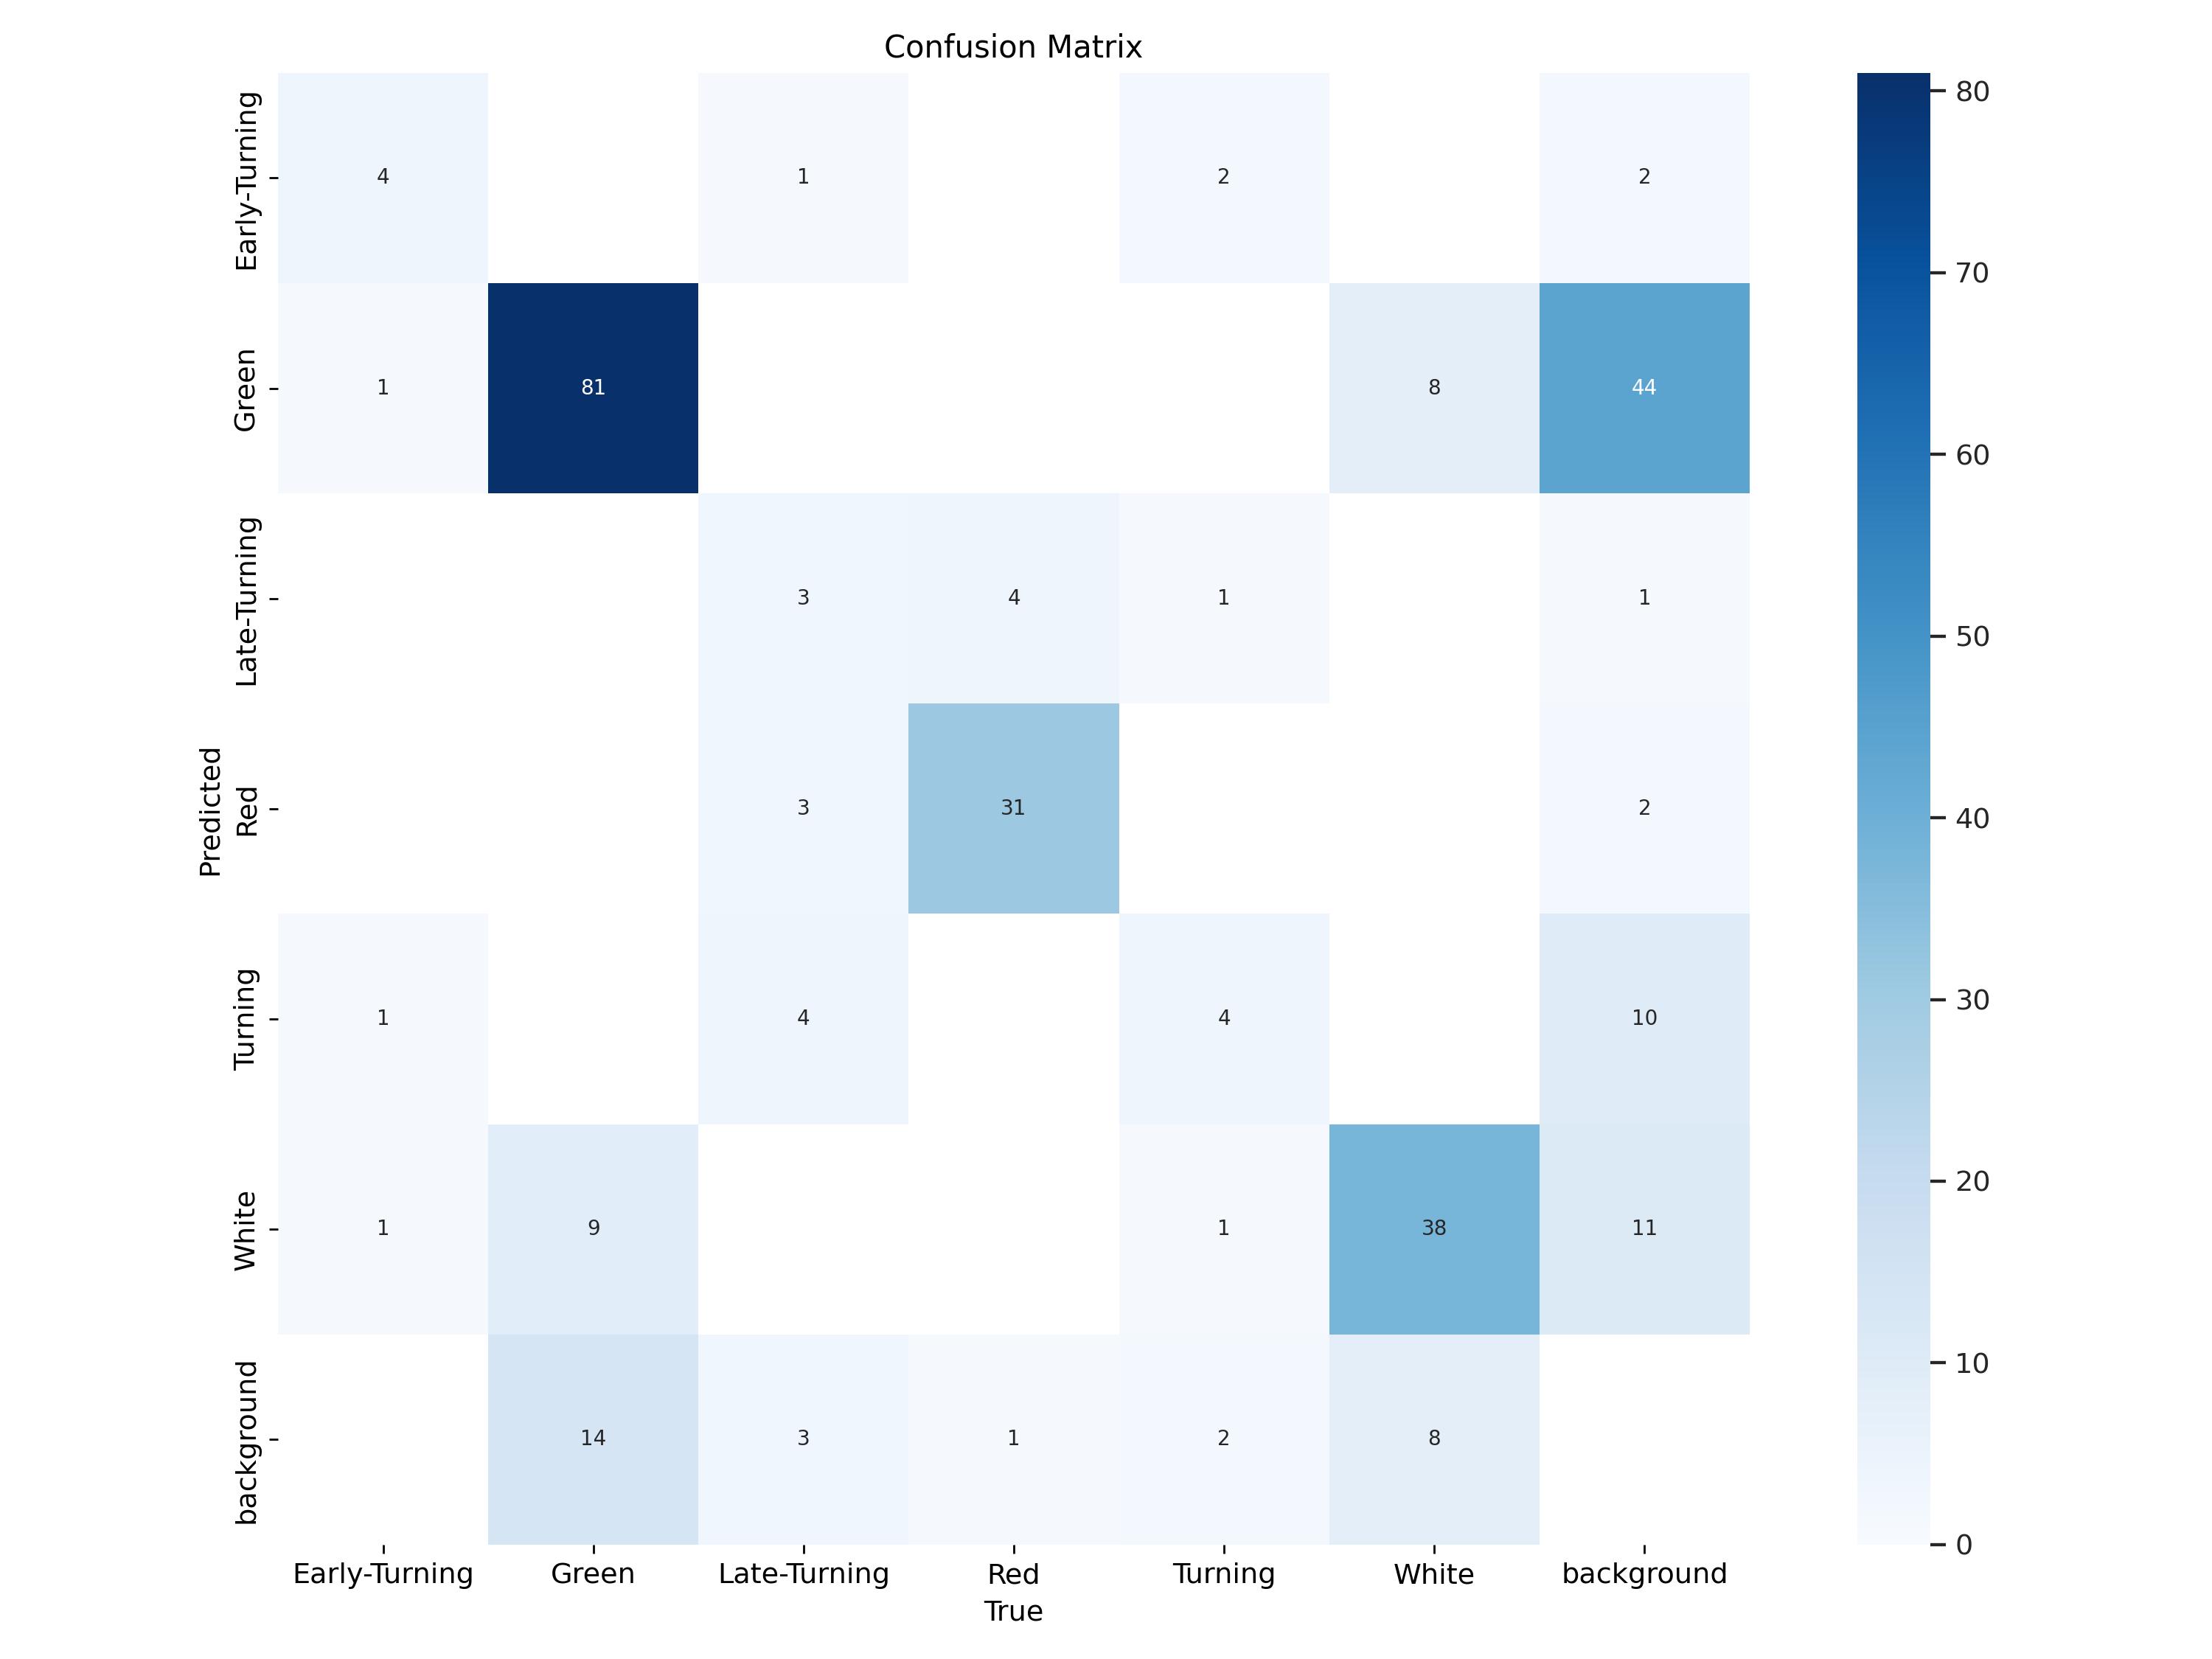

In [ ]:
from IPython.display import Image
Image('/content/runs/detect/train/confusion_matrix.png', width=600)

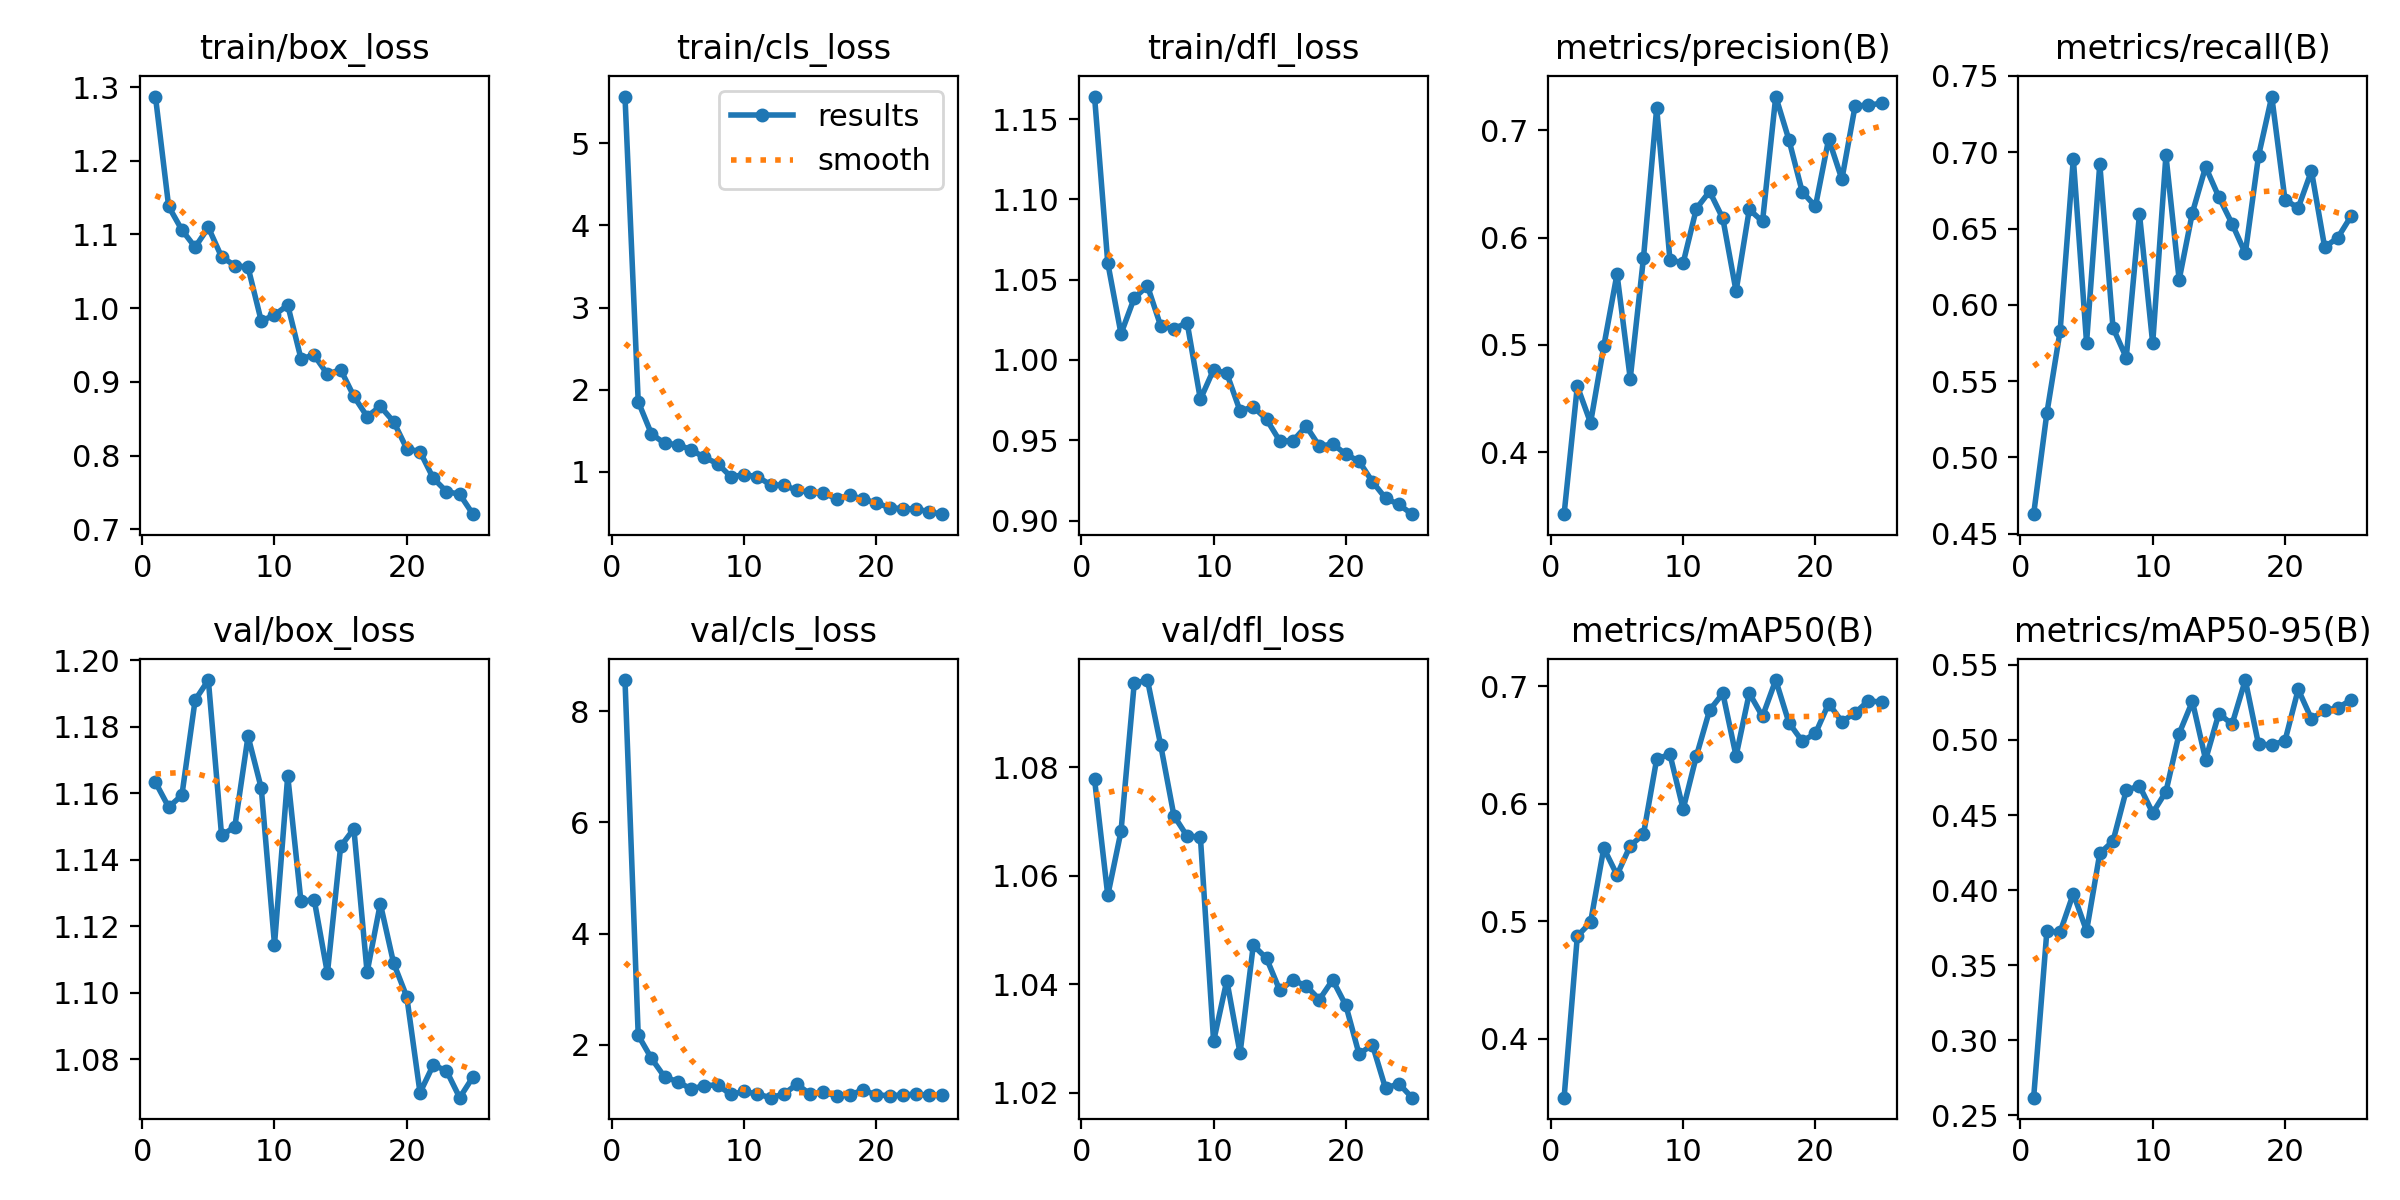

In [ ]:
Image('/content/runs/detect/train/results.png',width=600)

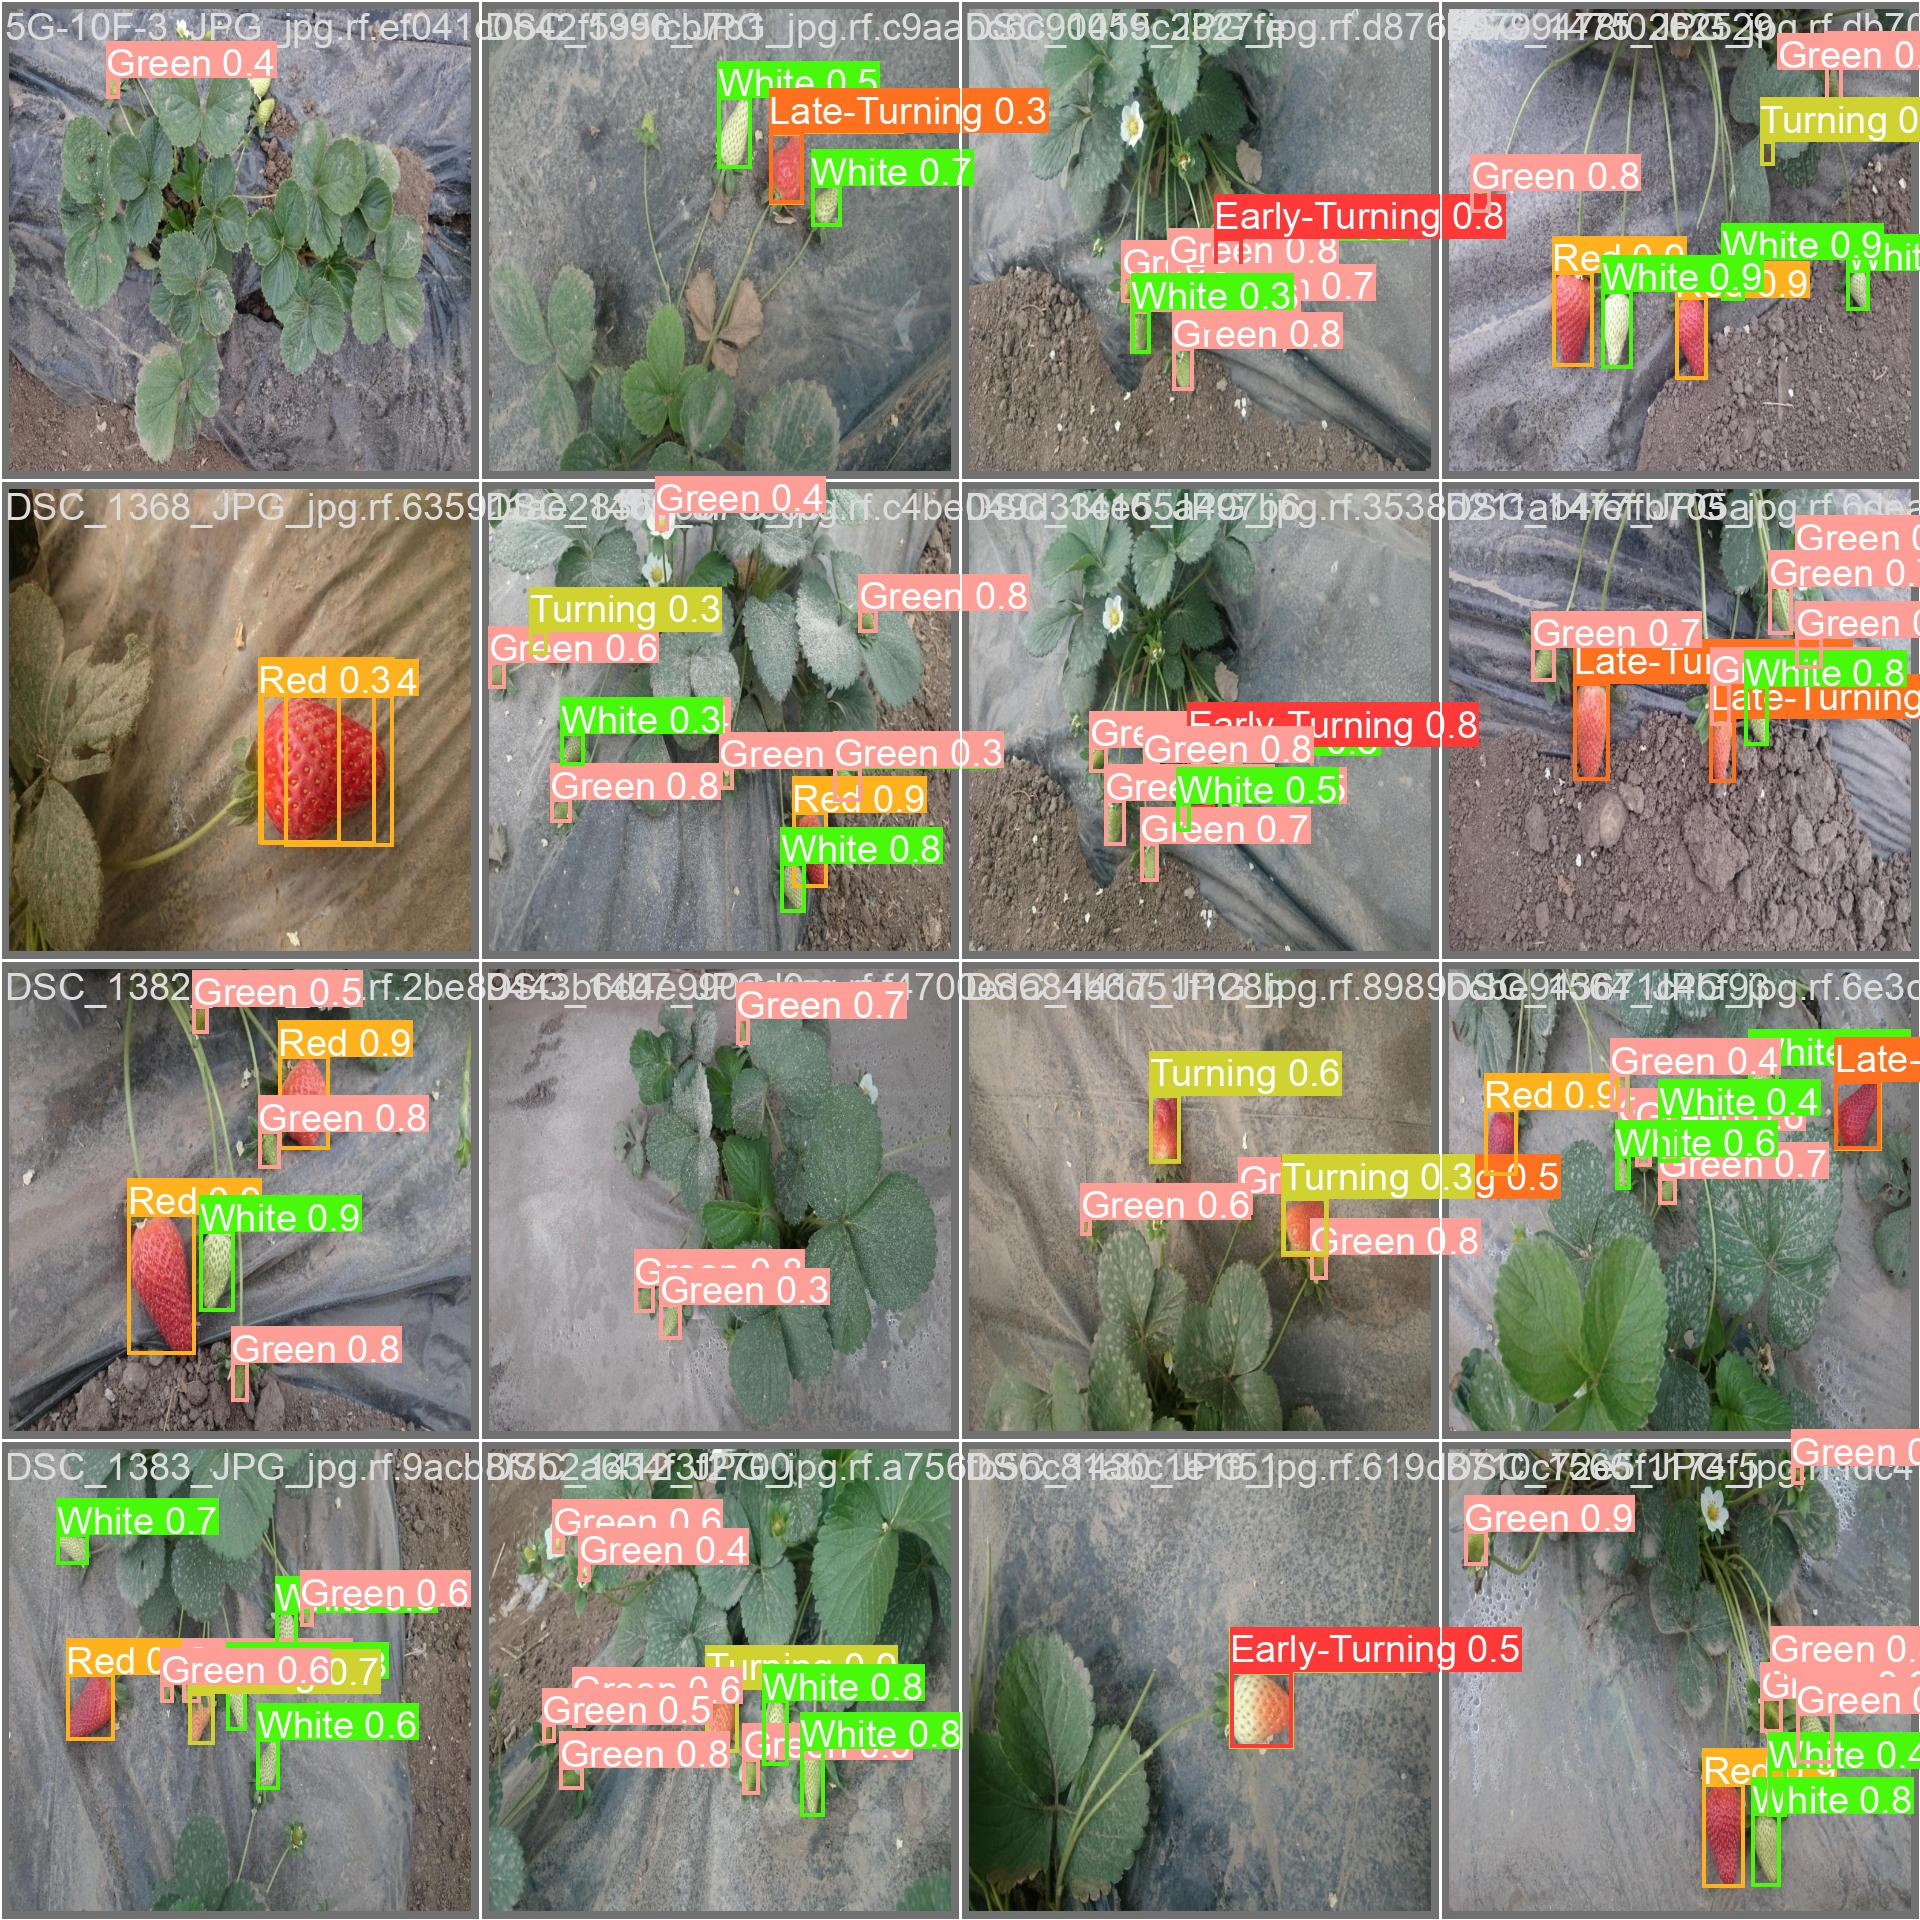

In [ ]:
Image('/content/runs/detect/train/val_batch0_pred.jpg',width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Fruit-Detection-1/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.61s/it]
                   all         49        225      0.731      0.634      0.705      0.543
         Early-Turning         49          7      0.995      0.857      0.858       0.73
                 Green         49        104      0.727      0.644      0.702       0.44
          Late-Turning         49         14      0.595      0.214      0.456      0.309
                   Red         49         36      0.866      0.889      0.921      0.787
               Turning         49         10      0.457        0.6      0.648      0.517
                 White         49         54 

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/26 /content/Fruit-Detection-1/test/images/4G-7F_JPG_jpg.rf.0f75dfd0ba7e2b89c88521ef70aa1717.jpg: 800x800 2 Greens, 1 Late-Turning, 2 Reds, 1 Turning, 1 White, 22.5ms
image 2/26 /content/Fruit-Detection-1/test/images/5G-10F-2_JPG_jpg.rf.80c4afcfd6abeea0a8d7d168ad2df583.jpg: 800x800 1 Green, 22.5ms
image 3/26 /content/Fruit-Detection-1/test/images/7G-15F-1_JPG_jpg.rf.308b555c62d57e2c0e670e9981e4997d.jpg: 800x800 3 Whites, 22.5ms
image 4/26 /content/Fruit-Detection-1/test/images/DSC_0562_JPG_jpg.rf.ea9b806dcfd63f88f32303d0ed931c71.jpg: 800x800 2 Greens, 22.5ms
image 5/26 /content/Fruit-Detection-1/test/images/DSC_0796_JPG_jpg.rf.f76c8fa1e1a7ae91ad0e672cf52485dc.jpg: 800x800 1 Green, 1 White, 22.3ms
image 6/26 /content/Fruit-Detection-1/test/images/DSC_0830_JPG_jpg.rf.39bf2

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/train/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, width=600))
  print("\n")

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  img = js_to_image(data)

  !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=img


